# Communities

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [ ]:
# Load data

edge_df = pd.read_csv("data/edges.csv", delimiter=",")
node_df = pd.read_csv("data/nodes.csv", delimiter=",")

G = nx.from_pandas_edgelist(edge_df, source="# source", target=" target", create_using=nx.Graph())

In [ ]:
from networkx.algorithms.community import asyn_lpa_communities, label_propagation_communities

In [ ]:


asyn_lpa_communities(G)

<generator object asyn_lpa_communities at 0x7fb0342ae430>

In [ ]:
partition = label_propagation_communities(LG)
len(partition)

625

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
LG = G.subgraph(largest_cc)
partition_LG = asyn_lpa_communities(LG)
type(partition_LG)

nx.number_of_nodes(LG)

4158

/opt/conda/lib/python3.8/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


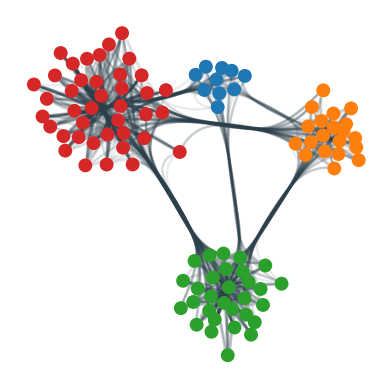

In [ ]:
# create a modular graph
from netgraph import Graph
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# since we created the graph, we know the best partition:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# # alternatively, we can infer the best partition using Louvain:
# from community import community_louvain
# node_to_community = community_louvain.best_partition(g)

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}

node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()

In [ ]:
from networkx.algorithms import community
len(list(community.asyn_lpa_communities(LG)))


TypeError: argmap_asyn_lpa_communities_9() got an unexpected keyword argument 'threshold'

In [ ]:
len(list(community.louvain_communities(LG, seed=10)))


41